In [56]:
from keras.datasets import reuters

In [57]:
# classifying newsires: a multiclass classification 
# we'll build a NN to classify Reuters newsires into 46 mutually topics
# the problem is more single-label, multiclass classification 
# 46 different topics, each topic has atleast 10 examples in the training set 


In [58]:
# num_words = 10000, restricts the data to 10000 most frequent words in the data 

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)


In [59]:
# 8982 training examples
len(train_data)

8982

In [60]:
# 2246 testing examples 
len(test_data)


2246

In [61]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [62]:
#preparing the data
# by vectorizing the data 

import numpy as np 

def vectorize_sequences(sequences, dimension = 10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequences in enumerate(sequences):
        results[i, sequences] = 1
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [63]:
# one-hot encoding is widely used format for categorical data
# also called categorical encoding

def to_one_hot(labels, dimension = 46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
        return results 
    
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [64]:
#alternative way for categorical encoding 

from keras.utils.np_utils import to_categorical 

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [65]:
#### MODEL DEFINITION
# you want to increase dimensional space to 64 units 
# with smaller units like 16, it can drop relevant information 
# for this reason, ill use larger layers, 64 units 

from keras import models 
from keras import layers 

model = models.Sequential()

# 3 layers in our NN
# first, 2 layers have 64 dimensional space, and relu activation function 
# the last layer, is our output with 46 units (categories)
# for each input sample, the network will output 1 46 -dimensional vector
# each entry in the vector will encode a diff output class

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

In [66]:
#### COMPILING THE MODEL 

# best loss function is the categorical_crossentroy, which measures the distnace 
#between the two prob distributions
# By min the distance between the two distributions, you train the network to output
#something as close as possible to the true labels

model.compile(optimizer = 'rmsprop', 
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])


In [67]:
#### SETTING ASIDE A VALIDATION SET 
# setting aside 1,000 samples in the training data to use a validation set

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [68]:
##### TRAINING THE MODEL 
# lets define epochs to 20

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20, 
                    batch_size = 512, 
                    validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 151us/step - loss: 2.4721 - accuracy: 0.4971 - val_loss: 1.6810 - val_accuracy: 0.6410
Epoch 2/20
7982/7982 [==============================] - 1s 87us/step - loss: 1.4000 - accuracy: 0.6962 - val_loss: 1.3199 - val_accuracy: 0.7150
Epoch 3/20
7982/7982 [==============================] - 1s 86us/step - loss: 1.0683 - accuracy: 0.7635 - val_loss: 1.1394 - val_accuracy: 0.7450
Epoch 4/20
7982/7982 [==============================] - 1s 84us/step - loss: 0.8397 - accuracy: 0.8128 - val_loss: 1.0370 - val_accuracy: 0.7660
Epoch 5/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.6761 - accuracy: 0.8552 - val_loss: 0.9775 - val_accuracy: 0.7900
Epoch 6/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.5394 - accuracy: 0.8865 - val_loss: 0.9318 - val_accuracy: 0.7960
Epoch 7/20
7982/7982 [==============================] - 1s 83us/step - loss: 0.43

In [69]:
len(partial_x_train)

7982

In [70]:
len(x_val)

1000

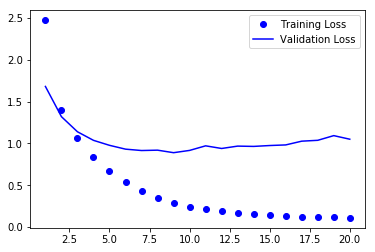

In [71]:
#### PLOTTING THE TRAINING AND VALIDATION LOSS 

import matplotlib.pyplot as plt 

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.legend()
plt.show()

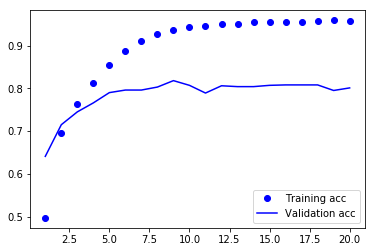

In [72]:
##### PLOTTING THE TRAINING AND VALIDATION ACCURACY 

### clears the figure 

a = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, a, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.legend()
plt.show()

In [73]:
# the model above, seenes like the the netwrok begins to overfit after nine epochs
# lets train a new network from scratch 

In [77]:
#### RETRAINING A MODEL FROM SCRATCH 

#settting up the architecture of the NN
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


# defining the paramets (loss and optimizer)
model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy', 
              metrics = ['accuracy'])

#training the model
model.fit(partial_x_train,
          partial_y_train, 
          epochs = 9,
          batch_size = 512,
          validation_data = (x_val, y_val))

results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 114us/step - loss: 2.6321 - accuracy: 0.5157 - val_loss: 1.7435 - val_accuracy: 0.6530
Epoch 2/9
7982/7982 [==============================] - 1s 84us/step - loss: 1.4353 - accuracy: 0.7080 - val_loss: 1.3313 - val_accuracy: 0.7040
Epoch 3/9
7982/7982 [==============================] - 1s 83us/step - loss: 1.0623 - accuracy: 0.7702 - val_loss: 1.1449 - val_accuracy: 0.7560
Epoch 4/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.8301 - accuracy: 0.8259 - val_loss: 1.0454 - val_accuracy: 0.7780
Epoch 5/9
7982/7982 [==============================] - 1s 91us/step - loss: 0.6513 - accuracy: 0.8609 - val_loss: 0.9664 - val_accuracy: 0.8050
Epoch 6/9
7982/7982 [==============================] - 1s 89us/step - loss: 0.5172 - accuracy: 0.8920 - val_loss: 0.9113 - val_accuracy: 0.8130
Epoch 7/9
7982/7982 [==============================] - 1s 85us/step - loss: 0.4165 - ac

In [78]:
# it reaches an accuracy of nearly 80% 
results

[0.9869090126543733, 0.7871772050857544]

In [80]:
# with binary classification problem, the accuracy reached by a purely randome classifier would be 50%
# in this case, its closer to 19%
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.18655387355298308

In [81]:
#### GENERATING PREDICTIONS FOR NEW DATA 
## lets verify that the predict method of the model instance returns a prob distribution over
# all 46 topics, lets generate topic predictions for all the test data

predictions = model.predict(x_test)

In [82]:
print(predictions)

[[1.80384217e-04 5.51297271e-05 5.34924002e-05 ... 4.53110169e-06
  3.17472109e-06 6.90075831e-05]
 [2.75524752e-03 1.74687710e-02 8.55129445e-04 ... 1.16045109e-03
  1.13559590e-05 3.35382310e-06]
 [2.02228897e-03 7.37049222e-01 6.91833906e-03 ... 1.52662897e-03
  2.90889846e-04 4.21143923e-04]
 ...
 [5.51811208e-05 2.67748110e-04 1.53456989e-04 ... 1.41322071e-05
  1.12404969e-05 1.04041166e-04]
 [7.39486795e-03 1.80083126e-01 5.48448274e-03 ... 5.49850753e-04
  4.44608042e-04 1.88416860e-03]
 [5.08833968e-04 4.98707533e-01 3.57030444e-02 ... 3.16461781e-03
  8.71447148e-04 3.52810923e-04]]


In [83]:
predictions[0].shape

(46,)

In [84]:
## the coefficient in the vector should sum close to 1
np.sum(predictions[0])


0.9999998

In [85]:
## largest entry is the predicted class, with the highest probability 
np.argmax(predictions[0])

3

In [86]:
# lets encode the labels as integer tensor

y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [88]:
# with integer labels, we change our loss function to sparse_categorical_crossentropy
# still mathematically the same, just different interface 

model.compile(optimizer = 'rmsprop',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [90]:
### TESING WITH 4 dimensionals on our second layer 

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(128, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

## training the data 

model.fit(partial_x_train,
          partial_y_train,
          epochs = 9,
          batch_size = 128,
          validation_data = (x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 161us/step - loss: 1.7309 - accuracy: 0.6429 - val_loss: 1.1805 - val_accuracy: 0.7360
Epoch 2/9
7982/7982 [==============================] - 1s 127us/step - loss: 0.9161 - accuracy: 0.7993 - val_loss: 0.9817 - val_accuracy: 0.7680
Epoch 3/9
7982/7982 [==============================] - 1s 123us/step - loss: 0.6046 - accuracy: 0.8672 - val_loss: 0.8696 - val_accuracy: 0.8070
Epoch 4/9
7982/7982 [==============================] - 1s 125us/step - loss: 0.4068 - accuracy: 0.9097 - val_loss: 0.8847 - val_accuracy: 0.8090
Epoch 5/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.2936 - accuracy: 0.9340 - val_loss: 1.0360 - val_accuracy: 0.7790
Epoch 6/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.2307 - accuracy: 0.9445 - val_loss: 0.9173 - val_accuracy: 0.8100
Epoch 7/9
7982/7982 [==============================] - 1s 124us/step - loss: 0.193

In [91]:
## validation accuracy peaks at 71%, 8% points where drop since we used a dimension less than the last layer 
## the model tried to compress alof of information into an intermediate space that is too low dimensional 

In [ ]:
#### with a multiclass classification problem, the network should end with a 
# softmax activation function so that it will output a prob distribution over the N output classes

# always use categorical crossentropy as the loss function. to min the distance between the pro dist
# output by the network and the true dist of the targets

# two ways to handle labels in multiclass classification
# 1. encoding the labels via categorical encoding -one_hot_encoding
# 2. encoding the labels as integers using sparse_categorical_crossentropy loss function

